In [1]:
# import stuff
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import system things
import tensorflow as tf
import numpy as np
import os
import pickle
from util import get_test_results
import cv2
import matplotlib.pyplot as plt

from data_generator_for_siamese import ImageDataGenerator
from datetime import datetime

from helper import get_dataset
import siamese
import glob
import re

In [2]:
# restore the model we wanty to test with
batch_size = 1
sess = tf.InteractiveSession()
siamese_model = siamese.siamese_network(batch_size)
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

# load the model
saver.restore(sess, './trained_models/C20LR0001/siamese_with_more_fonts21.ckpt')

Adding Data Augmentation
Adding Data Augmentation
INFO:tensorflow:Restoring parameters from ./trained_models/C20LR0001/siamese_with_more_fonts21.ckpt


In [15]:
# left images filenames
left_files = glob.glob('./small_sample_test/original/*')
right_files = glob.glob('./small_sample_test/right_images/*')

#f = open('./small_sample_test/txt_file/words.txt')
#word_list = f.readlines()
#f.close()

#test_words = [l.strip('\n') for l in word_list]

left_id = np.random.randint(len(left_files))

Original Image


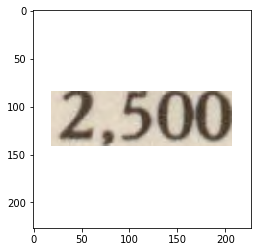

Top 5 synthetic images are


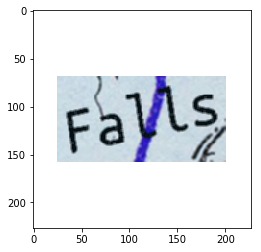

Distance: 0.346959531307


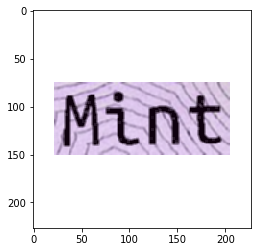

Distance: 0.729361176491


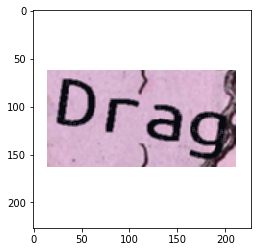

Distance: 1.10884308815


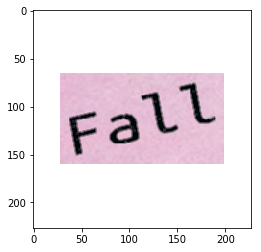

Distance: 4.11500024796


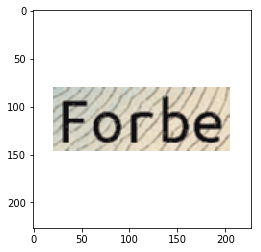

Distance: 5.52392244339


In [16]:
from scipy.spatial import distance
LI = []
LI.append(cv2.imread(left_files[left_id]))
#left_ids_available = range()
dis_vals = []
for filename in right_files:
    RI = []
    RI.append(cv2.imread(filename))
    result_vectors_left = siamese_model.o1.eval({siamese_model.x1: LI})
    result_vectors_right = siamese_model.o1.eval({siamese_model.x1: RI})
    #print(result_vectors_right.shape)
    #result = get_test_results(test_words, result_vectors)
    #print(len(result))
    dis_vals.append(distance.euclidean(result_vectors_left,result_vectors_right))
    #print("Original Image")
    #plt.imshow(LI[0])
    #plt.show()
    #print("Synthetic Image")
    #plt.imshow(RI[0])
    #plt.show()
    #print("Distance:", d)
# rank top 5
dis_vals = np.array(dis_vals)
qualified_ids = dis_vals.argsort()[0:5]
print("Original Image")
plt.imshow(LI[0])
plt.show()
print("Top 5 synthetic images are")
for i in qualified_ids:
    plt.imshow(cv2.imread(right_files[i]))
    plt.show()
    print("Distance:", dis_vals[i])
pass